# Введение

В этом ноутбуке Вы обучите модель, способную играть в игру StreetFighter II.
Наша модель будет работать на базе сверточной сети и обучается в режиме Actor-Critic.
Поможет обучить нашу модель настройка гиперпараметров модели (HPO)

# Установка зависимостей

### Обратите внимание, что рассматриваемый Python в ноутбуке - 3.7.17

In [1]:
#Установка библиотек осуществляется командой pip install <package>
#!pip install gym==0.21.0 gym-retro
# Для установки всех требуемых библиотек
# !pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [8]:
import retro
import numpy as np
import time
import os

In [2]:
# Список всех доступных игр в библиотеке
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

## Установка игры StreetFighter из образа ROM

In [ ]:
# Активируем окружение, в котором установлена библиотека retro
# source <venv_name>/bin/activate
# Идем с помощью команд cd (или аналогичных на Windows) в директорию с данным ноутбуком
# Далее импортируем наш образ игры заранее скаченныйи и лежащий рядом с ноутбуком командой
# python -m retro.import . 

In [3]:
env=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

In [50]:
#Библиотека retro, поддерживает единомоментно только 1 окружение.
#Если Вам необходимо начать заново, воспользуйтесь этой командой 
env.close()

In [14]:
env.observation_space # Наше пространство наблюдения

Box([[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], [[[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 ...

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]], (84, 84, 1), uint8)

In [13]:
env.action_space # 12 кнопок нашей игры, на которые агент сможет "нажать"

MultiBinary(12)

In [6]:
# Посмотрим на геймплей игры, где наш персонаж выбирает случайно свои действия
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.01)
        print(reward)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
500.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1000.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

In [7]:
env.close()

# Перед обучением давайте настроим наше окружение агента

In [9]:
# Import environment base class for a wrapper 
from gym import Env 
# Import the space shapes for the environment
from gym.spaces import MultiBinary, Box
# Import numpy to calculate frame delta 
import numpy as np
# Import opencv for grayscaling
import cv2
# Import matplotlib for plotting the image
from matplotlib import pyplot as plt

In [10]:
class StreetFighter(Env): 
    def __init__(self):
        super().__init__()
        
        # Определяем пространство состояний (observation space)
        # - Изображение 84x84 пикселя в градациях серого (1 канал)
        # - Значения пикселей от 0 до 255 (тип uint8)
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        
        # Определяем пространство действий (action space)
        # - MultiBinary(12) означает, что у нас 12 бинарных кнопок (нажата/не нажата)
        self.action_space = MultiBinary(12)
        
        # Запускаем игру Street Fighter II с использованием библиотеки retro
        # - "FILTERED" означает, что будут использоваться только важные действия
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
    
    def reset(self):
        """
        Сбрасывает среду в начальное состояние и возвращает первый кадр.
        """
        obs = self.game.reset()  # Сбрасываем игру и получаем первый кадр
        obs = self.preprocess(obs)  # Обрабатываем изображение (черно-белое, уменьшение размера)
        self.previous_frame = obs  # Запоминаем этот кадр для разницы кадров

        # Создаем атрибут для хранения счёта
        self.score = 0 
        
        return obs  # Возвращаем обработанный кадр
    
    def preprocess(self, observation): 
        """
        Обрабатывает входной кадр: переводит в оттенки серого и уменьшает размер.
        """
        # Преобразуем изображение в градации серого
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        
        # Изменяем размер изображения до 84x84 пикселей
        resize = cv2.resize(gray, (84,84), interpolation=cv2.INTER_CUBIC)
        
        # Добавляем дополнительное измерение (канал 1), чтобы соответствовать формату сети
        channels = np.reshape(resize, (84,84,1))
        
        return channels  # Возвращаем обработанное изображение
    
    def step(self, action): 
        """
        Выполняет действие в игре, получает новый кадр, награду, информацию о состоянии игры.
        """
        # Выполняем действие в игре
        obs, reward, done, info = self.game.step(action)
        
        # Обрабатываем новый кадр (грейскейл + изменение размера)
        obs = self.preprocess(obs) 
        
        # Вычисляем разницу между текущим и предыдущим кадром (frame delta)
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs  # Запоминаем текущий кадр для следующего шага
        
        # Пересчитываем награду: разница в счёте игры (улучшение результата)
        reward = info['score'] - self.score 
        self.score = info['score']  # Обновляем текущий счёт
        
        # Возвращаем:
        # - Изменения в кадре (разница между текущим и предыдущим)
        # - Новую награду (изменение счёта)
        # - Флаг окончания игры (done)
        # - Дополнительную информацию (info)
        return frame_delta, reward, done, info
    
    def render(self, *args, **kwargs):
        """
        Отображает текущий кадр игры.
        """
        self.game.render()
        
    def close(self):
        """
        Завершает работу среды.
        """
        self.game.close()

In [11]:
env = StreetFighter()

In [12]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.01)
        if reward > 0: 
            print(reward)

500
1000
1000
300
300
300
1000
500
100
500
500
100


In [15]:
obs = env.reset()

In [16]:
obs, reward, done, info = env.step(env.action_space.sample())

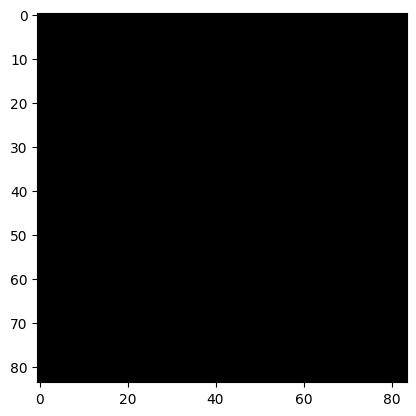

In [17]:
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

# Выбор сети и настройка гиперпараметров сети

PPO — это алгоритм обучения с подкреплением, который используется для обучения агентов. Он является одним из наиболее популярных и эффективных методов для задач RL (Reinforcement Learning). PPO использует подход "проксимальной оптимизации", который позволяет обучать агента на основе взаимодействия с окружением, улучшая политику на каждом шаге, но делая это с некоторыми ограничениями, чтобы избежать слишком больших изменений.

In [21]:
# Импортируем библиотеку для оптимизации гиперпараметров (HPO - Hyperparameter Optimization)
import optuna
# Алгоритм PPO для обучения с подкреплением (RL)
from stable_baselines3 import PPO
# Импортируем метод оценки стратегии агента (метрика качества)
from stable_baselines3.common.evaluation import evaluate_policy
# Импортируем монитор для логирования результатов обучения
from stable_baselines3.common.monitor import Monitor
# Импортируем обертки для векторизации среды и стек кадров
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [22]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [23]:
# Функция для оптимизации гиперпараметров PPO - определяем объектную функцию для Optuna
def optimize_ppo(trial):  
    return {
        # Выбираем количество шагов перед обновлением градиента (от 2048 до 8192)
        # Большее значение делает обучение стабильнее, но требует больше памяти
        'n_steps': trial.suggest_int('n_steps', 2048, 8192),

        # Дисконтирующий фактор (gamma) - определяет, насколько агент учитывает будущие награды
        # Оптимизируем в логарифмическом масштабе от 0.8 до 0.9999 (чем ближе к 1, тем больше агент смотрит в будущее)
        'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),

        # Скорость обучения - важный гиперпараметр, влияющий на сходимость модели
        # Оптимизируем в диапазоне 1e-5 (0.00001) до 1e-4 (0.0001)
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),

        # Коэффициент обрезки (clip range) - предотвращает слишком резкие обновления стратегии в PPO
        # Выбираем значение от 0.1 до 0.4, где 0.2-0.3 обычно считается оптимальным
        'clip_range': trial.suggest_uniform('clip_range', 0.1, 0.4),

        # Параметр λ (GAE-lambda) для обобщенной оценки преимущества (Generalized Advantage Estimation)
        # Определяет, насколько агент использует "бутстрапинг" при оценке награды
        # Оптимизируем в диапазоне от 0.8 до 0.99
        'gae_lambda': trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }


In [24]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [19]:
def optimize_agent(trial):  # Функция для оптимизации агента с помощью Optuna
    try:
        # Получаем гиперпараметры, подобранные Optuna
        model_params = optimize_ppo(trial)  

        # Создаем среду для обучения агента
        env = StreetFighter()  # Запускаем кастомную среду Street Fighter II
        env = Monitor(env, LOG_DIR)  # Логируем данные обучения (награды, длину эпизодов)
        env = DummyVecEnv([lambda: env])  # Векторизуем среду (ускоряет обучение)
        env = VecFrameStack(env, 4, channels_order='last')  # Стекуем 4 кадра (учитываем движение в игре)

        # Создаем модель PPO с CNN-политикой
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)

        # Обучаем модель на 30 000 шагов
        model.learn(total_timesteps=30000)  
        # model.learn(total_timesteps=100000)  # Альтернативный вариант с 100 000 шагами

        # Оцениваем стратегию агента: средняя награда за 5 эпизодов
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        
        # Закрываем среду после обучения
        env.close()

        # Сохраняем модель с уникальным именем (в папке OPT_DIR)
        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward  # Возвращаем среднюю награду агента

    except Exception as e:
        return -1000  # Если произошла ошибка, возвращаем низкую награду, чтобы Optuna исключила этот вариант


In [20]:
# Создаем эксперимент Optuna
study = optuna.create_study(direction='maximize')  
# Оптимизируем гиперпараметры, запуская 10 испытаний (n_trials=10)
study.optimize(optimize_agent, n_trials=10, n_jobs=1)  

# study.optimize(optimize_agent, n_trials=100, n_jobs=1)  # Альтернативный вариант с 100 испытаниями


[I 2025-03-17 13:25:02,291] A new study created in memory with name: no-name-339113d5-e3af-46d0-9207-7326e5a509c2
/home/user/projects/venvs/p3.7.17/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  """
/home/user/projects/venvs/p3.7.17/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  
/home/user/projects/venvs/p3.7.17/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  import sys
/home/

In [21]:
study.best_params

{'n_steps': 6027,
 'gamma': 0.9569794407478163,
 'learning_rate': 2.94435102723583e-05,
 'clip_range': 0.18391195756935189,
 'gae_lambda': 0.8834209771782421}

In [22]:
study.best_trial

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-1000.0], datetime_start=datetime.datetime(2025, 3, 17, 13, 25, 2, 292908), datetime_complete=datetime.datetime(2025, 3, 17, 13, 25, 2, 368481), params={'n_steps': 6027, 'gamma': 0.9569794407478163, 'learning_rate': 2.94435102723583e-05, 'clip_range': 0.18391195756935189, 'gae_lambda': 0.8834209771782421}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=0, value=None)

In [23]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_10_best_model.zip'))

FileNotFoundError: [Errno 2] No such file or directory: 'opt/trial_5_best_model.zip.zip'

# Настройка Callback

Коллбек — это специальный объект, который позволяет вам вмешиваться в процесс обучения модели. Коллбеки предоставляют возможность отслеживать обучение, сохранять модель, изменять параметры или выполнять другие действия на каждом шаге обучения или через определенные промежутки времени.

In [24]:
# Импортируем базовый коллбек из библиотеки stable_baselines3
from stable_baselines3.common.callbacks import BaseCallback

In [25]:
# Определяем собственный коллбек TrainAndLoggingCallback для обучения и логирования
class TrainAndLoggingCallback(BaseCallback):

    # Инициализация коллбека с параметрами: частота проверки (check_freq), путь сохранения модели (save_path) и уровень логирования (verbose)
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)  # Вызываем конструктор родительского класса
        self.check_freq = check_freq  # Сохраняем частоту сохранений
        self.save_path = save_path  # Сохраняем путь для сохранения модели

    # Метод инициализации коллбека
    def _init_callback(self):
        if self.save_path is not None:  # Проверяем, задан ли путь для сохранения
            os.makedirs(self.save_path, exist_ok=True)  # Создаём директорию для сохранений, если она не существует

    # Метод, который вызывается на каждом шаге обучения
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:  # Если номер текущего шага кратен частоте сохранений
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))  # Формируем путь для сохранения модели
            self.model.save(model_path)  # Сохраняем модель

        return True  # Возвращаем True для продолжения обучения

In [26]:
# Указываем директорию для сохранения модели
CHECKPOINT_DIR = './train/'

In [27]:
# Создаём экземпляр коллбека с частотой сохранений 10000 шагов
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Обучаем модель 

In [25]:
# Создаем окружение игры StreetFighter
env = StreetFighter()

# Оборачиваем окружение в Monitor для отслеживания статистики, такой как количество шагов, награды и т.д.
env = Monitor(env, LOG_DIR)

# Оборачиваем окружение в DummyVecEnv для векторизации, что позволяет работать с несколькими экземплярами окружений одновременно.
env = DummyVecEnv([lambda: env])

# Оборачиваем окружение в VecFrameStack, чтобы объединить несколько последних кадров в одно состояние (в данном случае 4 кадра).
# Это необходимо для того, чтобы модель могла учитывать временные зависимости, например, движение в игре.
env = VecFrameStack(env, 4, channels_order='last')


RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

In [27]:
# env.close() # Если необходимо окончить env

In [31]:
# Получаем лучшие параметры модели из результатов гиперпараметрической оптимизации (используя study)
model_params = study.best_params

# Устанавливаем значение n_steps равным 7488 (или его кратному 64), чтобы обеспечить оптимальную настройку шага.
model_params['n_steps'] = 7488  # устанавливаем n_steps в 7488 или кратное 64

# Закомментированное изменение: установка скорости обучения на очень маленькое значение (5e-7).
# model_params['learning_rate'] = 5e-7

# Возвращаем обновленные параметры модели
model_params


{'n_steps': 7488,
 'gamma': 0.9569794407478163,
 'learning_rate': 2.94435102723583e-05,
 'clip_range': 0.18391195756935189,
 'gae_lambda': 0.8834209771782421}

In [32]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cuda device
Wrapping the env in a VecTransposeImage.


CnnPolicy — это тип политики (policy), использующий сверточные нейронные сети (CNN), специально предназначенный для работы с изображениями и визуальными данными в контексте обучения с подкреплением.

Как работает CnnPolicy?

    В рамках Stable Baselines3, CnnPolicy применяется, когда агент должен воспринимать данные как изображения.
    Сверточные слои в модели автоматически выделяют важные признаки (например, формы, цвета, контуры) из исходных изображений.
    Это позволяет агенту принимать решения, основанные на визуальной информации, а не на числовых состояниях.

In [33]:
# Загружаем предыдущие веса модели из оптимизации гиперпараметров (HPO).
# Мы загружаем лучшую модель из конкретного эксперимента (trial_5) из директории, где хранятся результаты оптимизации гиперпараметров.
model.load(os.path.join(OPT_DIR, 'trial_5_best_model.zip'))

FileNotFoundError: [Errno 2] No such file or directory: 'opt/trial_5_best_model.zip.zip'

In [34]:
# Запускаем обучение модели с общим количеством временных шагов  100,000. Можно поставить меньше
# В процессе обучения будет использован функция для отслеживания и сохранения модели.
model.learn(total_timesteps=100000, callback=callback)

# Закомментированное обучение на 5,000,000 шагов. Может потребовать много времени
# model.learn(total_timestep=5000000)

Logging to ./logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 388  |
|    iterations      | 1    |
|    time_elapsed    | 19   |
|    total_timesteps | 7488 |
-----------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.01e+04     |
|    ep_rew_mean          | 3.69e+04     |
| time/                   |              |
|    fps                  | 291          |
|    iterations           | 2            |
|    time_elapsed         | 51           |
|    total_timesteps      | 14976        |
| train/                  |              |
|    approx_kl            | 0.0061032823 |
|    clip_fraction        | 0.0915       |
|    clip_range           | 0.184        |
|    entropy_loss         | -8.31        |
|    explained_variance   | 5.02e-05     |
|    learning_rate        | 2.94e-05     |
|    loss                 | 823          |
|    n_updates            | 10     

KeyboardInterrupt: 

# Опробуем модель

In [35]:
# Загружаем сохраненную модель PPO из указанного пути.
# Модель была сохранена в файле 'best_model_5460000.zip', который находится в указанной директории.
model = PPO.load('/home/user/projects/science/ROS_meetup2025/roms/best_model_5460000.zip')

In [36]:
# Оцениваем модель на тестовом окружении, выполняя 1 эпизод.
# В процессе будет отображаться визуализация (render=True), и вычисляется средняя награда (mean_reward) за этот эпизод.
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)

KeyboardInterrupt: 

In [37]:
# Выводим среднюю награду за эпизод.
mean_reward

NameError: name 'mean_reward' is not defined

# Тестируем нашу модель в игровом эпизоде

In [42]:
obs = env.reset()

In [43]:
obs.shape

(1, 84, 84, 4)

In [40]:
env.step(model.predict(obs)[0])

(array([[[[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  33,   0],
          ...,
          [  0,   0,  37,   0],
          [  0,   0,  34,   0],
          [  0,   0,  36,   0]],
 
         [[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  35,   0],
          ...,
          [  0,   0,  36,   0],
          [  0,   0,  40,   0],
          [  0,   0,  40,   0]],
 
         [[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  36,   0],
          ...,
          [  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  36,   0]],
 
         ...,
 
         [[  0,   0, 162,   0],
          [  0,   0, 159,   0],
          [  0,   0, 159,   0],
          ...,
          [  0,   0, 159,   0],
          [  0,   0, 159,   0],
          [  0,   0, 159,   0]],
 
         [[  0,   0, 162,   0],
          [  0,   0, 162,   0],
          [  0,   0, 162,   0],
          ...,
          [  0,   0, 162,   0],
 

In [45]:
# Начало эпизода игры
obs = env.reset()
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.01)
        print(reward)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[300.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
